In [4]:
import os
import glob
from sklearn import preprocessing
import sklearn as skl
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
data_df = pd.read_pickle('processed_data_df.pkl')

In [9]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data_df, test_size = .20, random_state=0)

In [10]:
print("Train Size = {} | Test Size = {} | Test is {}% of Train".format(len(train_df),len(test_df), len(test_df)/len(data_df)))

Train Size = 12909793 | Test Size = 3227449 | Test is 0.20000003718107467% of Train


In [11]:
train_df.describe()

,ACK Flag Cnt,Active Max,Active Mean,Active Min,Active Std,Bwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Header Len,Bwd IAT Max,Bwd IAT Mean,...,Src Port,Subflow Bwd Byts,Subflow Bwd Pkts,Subflow Fwd Byts,Subflow Fwd Pkts,Tot Bwd Pkts,Tot Fwd Pkts,TotLen Bwd Pkts,TotLen Fwd Pkts,URG Flag Cnt
count,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,12909793.0,12909793.0,1.290979e+07,1.290979e+07,1.290979e+07,...,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07
mean,3.281827e-01,2.632066e+05,1.733903e+05,1.158532e+05,8.665526e+04,0.0,0.0,1.333694e+02,2.629842e+06,8.297453e+05,...,2.229451e+04,4.724166e+03,6.325293e+00,9.910783e+02,2.394488e+01,6.325293e+00,2.394488e+01,4.724160e+03,9.910783e+02,4.199564e-02
std,4.695517e-01,3.322882e+06,2.509243e+06,2.117611e+06,1.515196e+06,0.0,0.0,3.161170e+03,1.027558e+07,4.356267e+06,...,2.705788e+04,2.275216e+05,1.589915e+02,6.539920e+04,1.537295e+03,1.589915e+02,1.537295e+03,2.275198e+05,6.539920e+04,2.005792e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.600000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,1.020000e+02,1.000000e+00,4.300000e+01,2.000000e+00,1.000000e+00,2.000000e+00,1.020000e+02,4.300000e+01,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.040000e+02,2.266230e+05,1.722560e+05,...,5.231000e+04,5.820000e+02,4.000000e+00,4.900000e+02,5.000000e+00,4.000000e+00,5.000000e+00,5.820000e+02,4.900000e+02,0.000000e+00
max,1.000000e+00,1.140000e+08,1.140000e+08,1.140000e+08,7.523241e+07,0.0,0.0,2.421832e+06,1.200000e+08,1.200000e+08,...,6.553500e+04,1.561992e+08,1.210910e+05,1.443918e+08,3.096290e+05,1.210910e+05,3.096290e+05,1.561992e+08,1.443918e+08,1.000000e+00


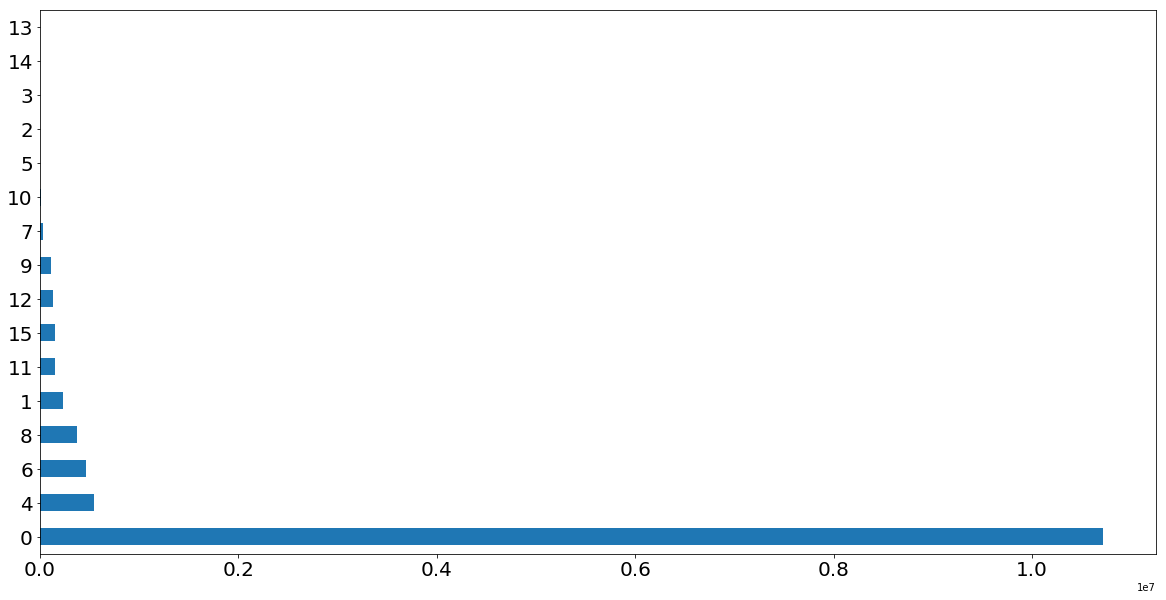

In [12]:
train_attack_types = train_df['Label'].value_counts()
test_attack_types = test_df['Label'].value_counts()
train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

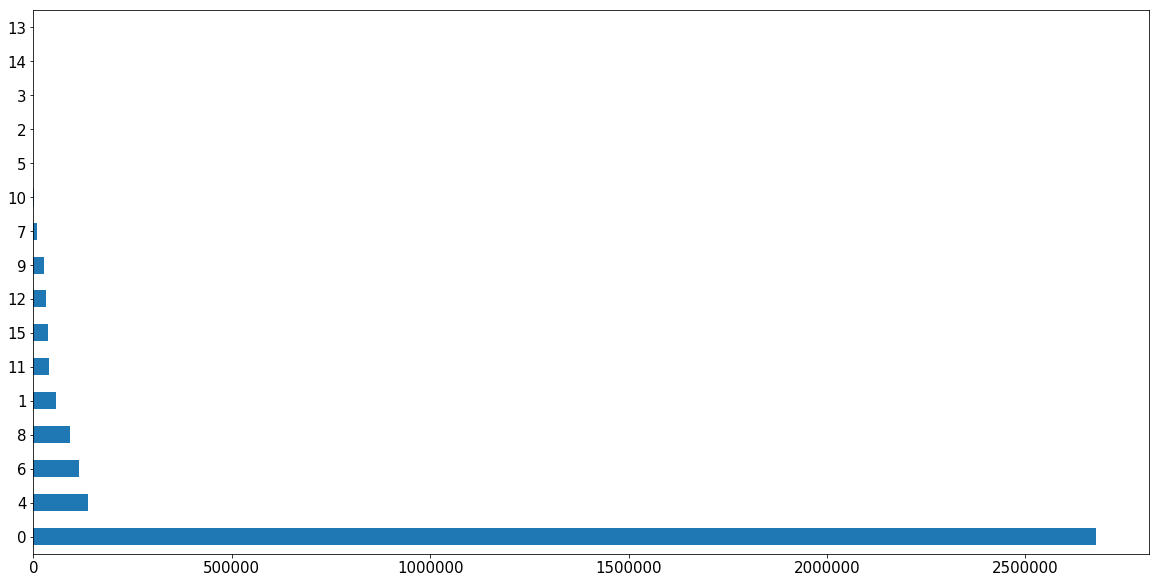

In [13]:
test_attack_types.plot(kind='barh', figsize=(20,10), fontsize=15)

In [14]:
train_Y = train_df['Label']
train_x_raw = train_df.drop(['Label'], axis=1)
test_Y = test_df['Label']
test_x_raw = test_df.drop(['Label'], 
                          axis=1)

In [15]:
combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=['Protocol'], drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

train_x.describe()

,ACK Flag Cnt,Active Max,Active Mean,Active Min,Active Std,Bwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Header Len,Bwd IAT Max,Bwd IAT Mean,...,Subflow Bwd Pkts,Subflow Fwd Byts,Subflow Fwd Pkts,Tot Bwd Pkts,Tot Fwd Pkts,TotLen Bwd Pkts,TotLen Fwd Pkts,URG Flag Cnt,Protocol_6.0,Protocol_17.0
count,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,12909793.0,12909793.0,1.290979e+07,1.290979e+07,1.290979e+07,...,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07,1.290979e+07
mean,3.281827e-01,2.632066e+05,1.733903e+05,1.158532e+05,8.665526e+04,0.0,0.0,1.333694e+02,2.629842e+06,8.297453e+05,...,6.325293e+00,9.910783e+02,2.394488e+01,6.325293e+00,2.394488e+01,4.724160e+03,9.910783e+02,4.199564e-02,7.253944e-01,2.598557e-01
std,4.695517e-01,3.322882e+06,2.509243e+06,2.117611e+06,1.515196e+06,0.0,0.0,3.161170e+03,1.027558e+07,4.356267e+06,...,1.589915e+02,6.539920e+04,1.537295e+03,1.589915e+02,1.537295e+03,2.275198e+05,6.539920e+04,2.005792e-01,4.463153e-01,4.385553e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.600000e+01,0.000000e+00,0.000000e+00,...,1.000000e+00,4.300000e+01,2.000000e+00,1.000000e+00,2.000000e+00,1.020000e+02,4.300000e+01,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,1.040000e+02,2.266230e+05,1.722560e+05,...,4.000000e+00,4.900000e+02,5.000000e+00,4.000000e+00,5.000000e+00,5.820000e+02,4.900000e+02,0.000000e+00,1.000000e+00,1.000000e+00
max,1.000000e+00,1.140000e+08,1.140000e+08,1.140000e+08,7.523241e+07,0.0,0.0,2.421832e+06,1.200000e+08,1.200000e+08,...,1.210910e+05,1.443918e+08,3.096290e+05,1.210910e+05,3.096290e+05,1.561992e+08,1.443918e+08,1.000000e+00,1.000000e+00,1.000000e+00


In [16]:
# Example statistics for the 'duration' feature before scaling
train_x['Flow Duration'].describe()

count    1.290979e+07
mean     1.183372e+07
std      5.337467e+08
min     -9.190110e+11
25%      5.130000e+02
50%      2.271000e+04
75%      3.050740e+06
max      1.200000e+08
Name: Flow Duration, dtype: float64

In [17]:
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['Flow Duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

count    1.290979e+07
mean     1.165865e-18
std      1.000000e+00
min     -1.721833e+03
25%     -2.217008e-02
50%     -2.212849e-02
75%     -1.645533e-02
max      2.026547e-01
dtype: float64

In [18]:
# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

count    1.290979e+07
mean     9.998823e-01
std      5.807080e-04
min      0.000000e+00
25%      9.998694e-01
50%      9.998695e-01
75%      9.998728e-01
max      1.000000e+00
dtype: float64

In [19]:
# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

count    1.290979e+07
mean     3.872174e+00
std      1.749859e+02
min     -3.012927e+05
25%     -7.277163e-03
50%      0.000000e+00
75%      9.927228e-01
max      3.933389e+01
dtype: float64

In [20]:
# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[:-2])

train_x[:-2] = \
    standard_scaler.transform(train_x[:-2])

test_x[:-2] = \
    standard_scaler.transform(test_x[:-2])

In [21]:
train_Y_bin = train_Y
test_Y_bin = test_Y

In [22]:
print(len(train_Y), len(train_x))

12909793 12909793


In [ ]:
train_x.to_pickle('train_x.pkl')
train_Y.to_pickle('train_Y.pkl')
test_x.to_pickle('test_x.pkl')
test_Y.to_pickle('test_Y.pkl')